<a href="https://colab.research.google.com/github/molecular-mar/molecular-mar.github.io/blob/master/Soluciones_Repaso1_PAQ24I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notas adicionales

* Los strings (textos) pueden ser convertidos en una lista usando el método `split(sep=)`, indicando en el argumento `sep` que caracter será utilizado para separar la cadena. Por defecto, se utiliza un espacio en blanco como separador.

Por ejemplo, si tenemos el siguiente string:

In [2]:
saludos = "hola,adios,ciao,arrivederci"

Podemos crear una lista de las palabras separadas por comas usando el método `split`:

In [5]:
palabras = saludos.split(sep=",") # split no modifica el string original. Es necesario guardar la lista generada en otra variable.
print("texto:",saludos)
print("lista:",palabras) # Nota como saludos permanece igual, y palabras es ahora una lista

texto: hola,adios,ciao,arrivederci
lista: ['hola', 'adios', 'ciao', 'arrivederci']


* El operador `in` nos permite verificar si un dato `x` se encuentra en la colección `Y` (se utiliza como: `x in Y`). Esta operación, al igual que otras comparaciones, da como resultado un booleano y puede usarse como condición:

In [6]:
print('hola' in saludos) # Imprimimos el resultado de preguntar: ¿Está 'hola' en la colección 'saludos'?
if 'ciao' in saludos: # Podemos usar esto para controlar el flujo del programa.
  print('Hay un italiano entre nosotros') # Intenta cambiando `ciao` por algo distinto

True
Hay un italiano entre nosotros


# Repaso Programación Aplicada a la Química

Los siguientes ejercicios servirán para practicar los temas: Ciclos, Condicionales y Funciones. No forman parte de la evaluación sumativa.
Las soluciones presentadas no son únicas, pero dan como resultado la respuesta esperada (el formato puede variar).

## Problema 1: Especies cargadas

1. Escribe un código que, a partir del número de protones y de electrones, indique si el sistema es un anión, un catión o es neutro. También indica cuando el valor no tiene sentido físico.
2. Adapta el punto anterior para utilizarlo en una función.
3. Usemos el siguiente formato para indicar la carga de una especie química: *formula_química{#carga/+ o -}*. Por ejemplo, para $[Cu(NH_3)_6]^{2-}$ escribiriamos *Cu(NH3)6{2-}*. Escribe un código que recupere solamente el signo asociado a la carga. Con base en esto, crea una función modificada de la anterior que use este tipo de formato.
4. La siguiente lista contiene una serie de especies neutras o cargadas:

```python
especies = ['Cl{-}', 'NH4{+}', 'H2O2', 'NO3{-}', 'Ca{2+}', 'SO4{2-}', 'N2O', 'K{+}', 'Fe{3+}', 'OH{-}', 'MnO4{-}', 'CuSO2', 'CH3COO{-}', 'CO3{2-}', 'Na{+}']
```

Escribe un código que indique cuantos aniones, cationes y especies neutras tiene la lista.



In [17]:
# Punto 1.

# Ambas variables deben contener datos numéricos
n_protones = 1
n_electrones = 1

# Resulta práctico primero verificar si los valores indicados tienen sentido:
if n_protones >= 1 and n_electrones >= 0: # Si tienen sentido, continuamos
    if n_electrones < n_protones:
      print("Catión")
    elif n_electrones == n_protones:
      print("Neutro")
    else:
      print("Anión")
else:
  print("Verifica el número de protones o de electrones")

Neutro


In [19]:
# Punto 2

# Es importante notar que datos queremos modificar y ponerlos como argumentos.
def carga_especie(n_protones, n_electrones):
  if n_protones >= 1 and n_electrones >= 0: # Si tienen sentido, continuamos
    if n_electrones < n_protones:
      print("Catión")
    elif n_electrones == n_protones:
      print("Neutro")
    else:
      print("Anión")
  else:
    print("Verifica el número de protones o de electrones")

# Probamos la función:
carga_especie(1,1)

Neutro


In [25]:
# Punto 3

#Primero, pensemos en como solo recuperar el signo. Usemos algunos ejemplos
sistema_a = "Cu(NH3)6{2-}" # anion
sistema_c = "Cu(NH3)6{2+}" # cation
sistema_n = "Cu(NH3)6" # neutro

#Una forma:
signo = sistema_n[-2] # Notemos que siempre el penúltimo caracter es el signo
print(signo) # ...excepto si nuestro sistema es neutro

)
Neutro


In [29]:
# Continua punto 3

# Podemos entonces proponer:

sistema_prueba = sistema_a
if sistema_prueba[-2] == '-':
  print('Anión')
elif sistema_prueba[-2] == '+':
  print('Catión')
else:
  print('Neutro')

Anión


In [30]:
# Continua punto 3

# En forma de función:
def carga_especie_2(sistema_prueba):
  # No verificaremos si el texto tiene sentido
  # Esta vez, usemos return para indicar el tipo
  if sistema_prueba[-2] == '-':
    return 'Anión'
  elif sistema_prueba[-2] == '+':
    return 'Catión'
  else:
    return 'Neutro'
# Nota: usamos sistema_prueba como argumento por facilidad,
# para solo copiar/pegar el código anterior. Pero podriamos
# usar otro nombre de argumento, cuidando de cambiar también
# en el contenido de la función.

# Verifiquemos
print(carga_especie_2(sistema_n))
print(carga_especie_2(sistema_a))
print(carga_especie_2(sistema_c))

Neutro
Anión
Catión


In [31]:
# Punto 4

# Aquí aprovecharemos el usar return en nuestra última función.
especies = ['Cl{-}', 'NH4{+}', 'H2O2', 'NO3{-}', 'Ca{2+}', 'SO4{2-}', 'N2O', 'K{+}', 'Fe{3+}', 'OH{-}', 'MnO4{-}', 'CuSO2', 'CH3COO{-}', 'CO3{2-}', 'Na{+}']

# Creamos algunas variables para acumular el número de cationes, de aniones y de especies neutras
n_cationes = 0
n_aniones = 0
n_neutras = 0

# Ciclo sobre cada especie
for especie in especies:
  tipo = carga_especie_2(especie)
  if tipo == "Anión":
    n_aniones += 1
  elif tipo == "Catión":
    n_cationes += 1
  else:
    n_neutras += 1

# Al final, imprimamos algunos mensajes
print('N. aniones:', n_aniones)
print('N. cationes:', n_cationes)
print('N. especies neutras:', n_neutras)

N. aniones: 7
N. cationes: 5
N. especies neutras: 3


## Problema 2: ADN

0. Los nucleótidos del ADN son adenina (A), guanina (G), citosina (C) y timina (T). Sabemos que solo pueden formarse pares *A-T* y *G-C*. En los siguientes ejercicios, usa las siguientes cadenas de ADN como ejemplo:
```
cadena_adn_1 = 'ATGCATCGTAGCATGC'
cadena_adn_2 = 'GCTAGCATCGTAGCTA'
```
1. Escribe un código que indique cuál es el último nucleótido de una cadena dada, así como el número de nucleótidos. La cadena estará dada como texto.
2. Crea una función que verifique que la cadena es válida (que solo esté formada por los nucleótidos posibles), imprimiendo un mensaje si es válida o no.
3. Un codón está formado por 3 nucleótidos. Escribe código que indique el número máximo de nucleótidos de una cadena de ADN.
4. Escribe un código que, a partir de una cadena de ADN, de como resultado la cadena complementaria.
5. Escribe un código que verifique que dos cadenas de ADN son complementarias.



In [33]:
# Punto 0

# Solo definamos las cadenas:
cadena_adn_1 = 'ATGCATCGTAGCATGC'
cadena_adn_2 = 'GCTAGCATCGTAGCTA'

In [34]:
# Punto 1

#El último nucleótido siempre tiene como índice -1
print("Para la cadena 1:")
print("Último nucleótido", cadena_adn_1[-1], ". Tamaño: ", len(cadena_adn_1))
print("Para la cadena 2:")
print("Último nucleótido", cadena_adn_2[-1], ". Tamaño: ", len(cadena_adn_2))

Para la cadena 1:
Último nucleótido C . Tamaño:  16
Para la cadena 2:
Último nucleótido A . Tamaño:  16


In [37]:
# Extra del punto 1. Indicar cuál es el nombre completo del nucleótido:

cadena_test = cadena_adn_1 # Cambiar por la cadena a probar
print("El último nucleótido es: ",end='')
if cadena_test[-1] == "A":
  print("Adenina")
elif cadena_test[-1] == "G":
  print("Guanina")
elif cadena_test[-1] == "C":
  print("Citosina")
elif cadena_test[-1] == "T":
  print("Timina")
else:
  print("No valido")

El último nucleótido es: Citosina


In [39]:
# Punto 2

# Es buena idea primero probar con un código que no sea una función
# y una vez verificado el funcionamiento adaptarlo a una función.
# Por brevedad, aquí solo se da la función:
def verificador_adn(cadena_prueba):
  for nucleotido in cadena_prueba:
    if nucleotido != 'A' and nucleotido != 'G' and nucleotido != 'C' and nucleotido != 'T':
      print("La cadena no es valida")
      # Algo no mencionado en clase: cuando se usa return, se termina la función
      return False # Regresemos un False si la cadena no es válida
  return True # Si no hubo errores en la cadena, no se ejecuta el otro return, y regresamos True

# Verifiquemos
print(verificador_adn(cadena_adn_1))
# Un ejemplo de cadena no valida
print(verificador_adn("ACGTGTGWGTCT"))

True
La cadena no es valida
False


In [44]:
# Punto 3

# Puede ser tan sencillo como dividir el tamaño de la cadena entre 3
cadena_test = cadena_adn_1
print("Número máximo de codones:", len(cadena_adn_1) // 3) # division entera, no hay fracciones de codón
# Extra. Por curiosidad, ¿Cuántos nucleótidos sobran que no completan un codón?
print("Número de nucleótidos sobrantes:", len(cadena_adn_1) % 3)

Número máximo de codones: 5
Número de nucleótidos sobrantes: 1


In [46]:
# Punto 4

cadena_test = cadena_adn_1
# Una opción:
# Vamos a acumular texto en una variable. Comencemos con una variable
# con texto vacio.
cadena_complementaria = ''
for nucleotido in cadena_test:
  # Adaptamos el código del extra del punto 1:
  if nucleotido == "A":
    cadena_complementaria += "T"
  elif nucleotido == "G":
    cadena_complementaria += "C"
  elif nucleotido == "C":
    cadena_complementaria += "G"
  elif nucleotido == "T":
    cadena_complementaria += "A"
  else:
    print("Error, verificar cadena")

# Verificamos:
print(cadena_complementaria)

TACGTAGCATCGTACG


In [55]:
# Punto 5

cadena_1 = cadena_adn_1
cadena_2 = cadena_complementaria
#Ejemplo de cadena no valida: descomentar las siguientes tres lineas
#cadena_2_lista = list(cadena_2)
#cadena_2_lista[0] = 'G'
#cadena_2 = ''.join(cadena_2_lista)

#Ambas cadenas deben de tener el mismo tamaño
tamanio_cadena1 = len(cadena_1)
tamanio_cadena2 = len(cadena_2)

if tamanio_cadena1 != tamanio_cadena2:
  print("Cadenas no complementarias: Tamaños no compatibles.")

# Comprobamos que cada nucleótido de la segunda cadena tenga
# el nucleótido complementario de la primera
for indice in range(tamanio_cadena1):
  nucleotido1 = cadena_1[indice]
  nucleotido2 = cadena_2[indice]
  if nucleotido1 == 'A' and nucleotido2 != 'T':
    print("Cadenas no complementarias.")
  elif nucleotido1 == 'T' and nucleotido2 != 'A':
    print("Cadenas no complementarias.")
  elif nucleotido1 == 'G' and nucleotido2 != 'C':
    print("Cadenas no complementarias.")
  elif nucleotido1 == 'C' and nucleotido2 != 'G':
    print("Cadenas no complementarias.")
  else:
    print("Nucleótidos complementarios")
# Podría mejorarse, si ponemos esto en una función y usamos return
# en lugar de solo print (ver Punto 2 de este problema)

Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios
Nucleótidos complementarios


## Problema 3: Electroquímica

0. Vamos a evaluar algunas celdas electroquímicas (baterías). Para ello haremos uso de 4 pares de cátodo-ánodo (Zinc-Carbon, Plomo-Ácido, Niquel-Cadmio, Ión-Litio), cuya información se encuentra en las siguientes listas:

```python
# Los potenciales están en V.
catodos = [
    {"reaccion": "MnO2 + H2O + e- -> MnO(OH) + OH-", "potencial": 0.15},  
    {"reaccion": "PbO2 + 4H+ + 2e- -> Pb2+ + 2H2O", "potencial": 1.68},  
    {"reaccion": "NiO(OH) + H2O + e- -> Ni(OH)2 + OH-", "potencial": 0.49},  
    {"reaccion": "LiCoO2 -> Li+ + CoO2 + e-", "potencial": 3.04},  
]

anodos = [
    {"reaccion": "Zn + 2OH- -> ZnO + H2O + 2e-", "potencial": -1.24},  
    {"reaccion": "Pb + SO4^2- -> PbSO4 + 2e-", "potencial": -0.36},  
    {"reaccion": "Cd + 2OH- -> Cd(OH)2 + 2e-", "potencial": -0.56},  
    {"reaccion": "C6H6O6 + Li+ + e- -> C6H5O6 + LiOH", "potencial": -0.13}  
]
```

1. Escribe un código que indique el potencial estándar (E^º) de cada celda, siguiendo la ecuación:

$$E^º_{celda} = E^º_{catodo} - E^º_{anodo}$$

Agrega cada potencial de celda en una nueva lista.

2. Crea un código que calcule el cambio en el potencial para un conjunto de pares de concentraciones de la especie reducida y de la especia oxidada:

```python
concentraciones = [(1.0, 0.1), (0.5, 0.2), (0.3, 0.3), (0.2, 0.5),(0.1, 1.0)]
```

La ecuación a seguir es:

$$E_{celda}=E^º_{celda}​−\frac{0.0592}{n}​ log\frac{[Red]}{[Ox]​}$$

Para cada batería, el número de electrones $n$ esta dado en la lista:

```python
electrones = [1,2,1,1]
```
3. Si el potencial de celda es negativo, la reacción es expontanea, y al contrario si es positivo. Crea un código que indique para los pares de concentraciones como es la reacción.


In [56]:
# Punto 0
# Los potenciales están en V.
catodos = [
    {"reaccion": "MnO2 + H2O + e- -> MnO(OH) + OH-", "potencial": 0.15},
    {"reaccion": "PbO2 + 4H+ + 2e- -> Pb2+ + 2H2O", "potencial": 1.68},
    {"reaccion": "NiO(OH) + H2O + e- -> Ni(OH)2 + OH-", "potencial": 0.49},
    {"reaccion": "LiCoO2 -> Li+ + CoO2 + e-", "potencial": 3.04},
]

anodos = [
    {"reaccion": "Zn + 2OH- -> ZnO + H2O + 2e-", "potencial": -1.24},
    {"reaccion": "Pb + SO4^2- -> PbSO4 + 2e-", "potencial": -0.36},
    {"reaccion": "Cd + 2OH- -> Cd(OH)2 + 2e-", "potencial": -0.56},
    {"reaccion": "C6H6O6 + Li+ + e- -> C6H5O6 + LiOH", "potencial": -0.13}
]

In [58]:
# Punto 1

n_celdas = len(catodos) # Hay igual número de catodos que de anodos
potenciales_celda = [] # Para guardar los valores de potencial
for indice in range(n_celdas):
  potencial_catodo = catodos[indice]['potencial']
  potencial_anodo = anodos[indice]['potencial']
  potencial_celda = potencial_catodo - potencial_anodo
  print("Potencial de celda n.", indice, "=", potencial_celda)
  potenciales_celda.append(potencial_celda) # Añadimos a la lista

#Verificamos
print(potenciales_celda)

Potencial de celda n. 0 = 1.39
Potencial de celda n. 1 = 2.04
Potencial de celda n. 2 = 1.05
Potencial de celda n. 3 = 3.17
[1.39, 2.04, 1.05, 3.17]


In [59]:
# Punto 2

# Nota que las concentraciones deben probarse para cada celda, y el número
# es distinto al número de celdas
import math
concentraciones = [(1.0, 0.1), (0.5, 0.2), (0.3, 0.3), (0.2, 0.5),(0.1, 1.0)]
electrones = [1,2,1,1]
potenciales_por_celda = []

for indice, potencial in enumerate(potenciales_celda):
  potenciales_por_concentracion = []
  for concentracion in concentraciones: # Nota que concentracion toma pares de valores de concentracion Red y Ox
    potencial_nuevo = potencial - (0.0592/electrones[indice]) * math.log10(concentracion[0]/concentracion[1])
    potenciales_por_concentracion.append(potencial_nuevo)
  potenciales_por_celda.append(potenciales_por_concentracion)

# Verificamos
print(potenciales_por_celda)

[[1.3308, 1.3664419514866153, 1.39, 1.4135580485133845, 1.4491999999999998], [2.0104, 2.0282209757433076, 2.04, 2.0517790242566925, 2.0696], [0.9908, 1.0264419514866154, 1.05, 1.0735580485133847, 1.1092], [3.1108, 3.146441951486615, 3.17, 3.1935580485133848, 3.2292]]


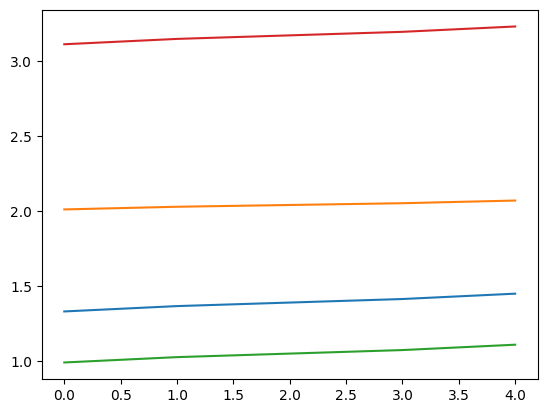

In [61]:
# Extra. Hagamos un gráfico
import matplotlib.pyplot as plt
plt.plot(range(5),potenciales_por_celda[0])
plt.plot(range(5),potenciales_por_celda[1])
plt.plot(range(5),potenciales_por_celda[2])
plt.plot(range(5),potenciales_por_celda[3])

In [63]:
# Punto 3

# No es necesario enumerate para resolver el punto 3, pero aquí de añade
# para que el programa indique en que caso el potencial es negativo

# La siguiente linea hace una modificación para que aparezca un potencial negativo
# Corre el código comentandola y descomentandola.
potenciales_por_celda[0][0] = -0.5

for indice_celda, potenciales in enumerate(potenciales_por_celda):
  for indice_concentraciones, potencial in enumerate(potenciales):
    if potencial > 0:
      print("La celda", indice_celda, "con el par de concentraciones", indice_concentraciones, "no es expontanea")
    elif potencial < 0:
      print("La celda", indice_celda, "con el par de concentraciones", indice_concentraciones, "es expontanea")

La celda 0 con el par de concentraciones 0 es expontanea
La celda 0 con el par de concentraciones 1 no es expontanea
La celda 0 con el par de concentraciones 2 no es expontanea
La celda 0 con el par de concentraciones 3 no es expontanea
La celda 0 con el par de concentraciones 4 no es expontanea
La celda 1 con el par de concentraciones 0 no es expontanea
La celda 1 con el par de concentraciones 1 no es expontanea
La celda 1 con el par de concentraciones 2 no es expontanea
La celda 1 con el par de concentraciones 3 no es expontanea
La celda 1 con el par de concentraciones 4 no es expontanea
La celda 2 con el par de concentraciones 0 no es expontanea
La celda 2 con el par de concentraciones 1 no es expontanea
La celda 2 con el par de concentraciones 2 no es expontanea
La celda 2 con el par de concentraciones 3 no es expontanea
La celda 2 con el par de concentraciones 4 no es expontanea
La celda 3 con el par de concentraciones 0 no es expontanea
La celda 3 con el par de concentraciones 1 